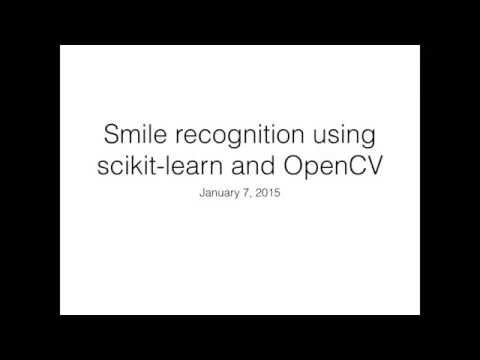

In [3]:
from IPython.display import YouTubeVideo
YouTubeVideo("mc3XGJaDEMc")

In [4]:
# Loading the faces dataset

In [5]:
%matplotlib inline
from pylab import *

In [6]:
from sklearn import datasets

In [7]:
faces = datasets.fetch_olivetti_faces()

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data


In [11]:
faces.keys()

dict_keys(['data', 'images', 'target', 'DESCR'])

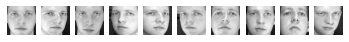

In [12]:
for i in range(10):
  face = faces.images[i]
  subplot(1, 10, i + 1)
  imshow(face.reshape((64,64)), cmap='gray')
  axis('off')

In [13]:
# labeling the training data

In [35]:
from ipywidgets import interact, Button, HBox
from IPython.display import display, clear_output

In [72]:
class Trainer:
  def __init__(self):
    self.results = {}
    self.imgs = faces.images
    self.index = 0

  def increment_face(self):
    if self.index + 1 >= len(self.imgs):
      return self.index
    else:
      while str(self.index) in self.results:
        print(self.index)
        self.index += 1
      return self.index

  def record_result(self, smile=True):
    self.results[str(self.index)] = smile

In [73]:
trainer = Trainer()

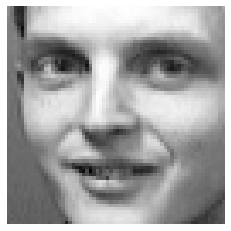

In [74]:
button_smile = Button(description='smile')
button_no_smile = Button(description='sad face')

def display_face(face):
  clear_output()
  imshow(face, cmap='gray')
  axis('off')

def update_smile(b):
  trainer.record_result(smile=True)
  trainer.increment_face()
  display_face(trainer.imgs[trainer.index])
  display(HBox([button_smile, button_no_smile]))

def update_no_smile(b):
  trainer.record_result(smile=False)
  trainer.increment_face()
  display_face(trainer.imgs[trainer.index])
  display(HBox([button_smile, button_no_smile]))


button_no_smile.on_click(update_no_smile)
button_smile.on_click(update_smile)


display_face(trainer.imgs[trainer.index])
display(HBox([button_smile, button_no_smile]))

In [80]:
print(trainer.results.keys())
print(trainer.results.values())

dict_keys(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129', '130', '131', '132', '133', '134', '135', '136', '137', '138', '139', '140', '141', '142', '143', '144', '145', '146', '147', '148', '149', '150', '151', '152', '153', '154', '155', '156', 

In [81]:
# Saving and loading results from labeling

In [82]:
import json

In [83]:
# saving
with open('results.xml', 'w') as f:
  json.dump(trainer.results, f)

In [84]:
results = json.load(open('results.xml'))

In [ ]:
from builtins import sum as s

([<matplotlib.axis.XTick at 0x7f89251286d0>,
 [Text(0, 0, 'no smile'), Text(0, 0, 'smile')])

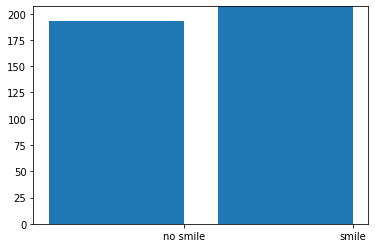

In [99]:
# Vasualization of training dataset
yes, no = s(results[x] == True for x in results), s(results[x] == False for x in results)

bar([0, 1], [no, yes])
ylim(0, max(yes, no))
xticks([0.4, 1.4], ['no smile', 'smile'])

In [100]:
smiling_indices = [int(i) for i in results if results[i] == True]

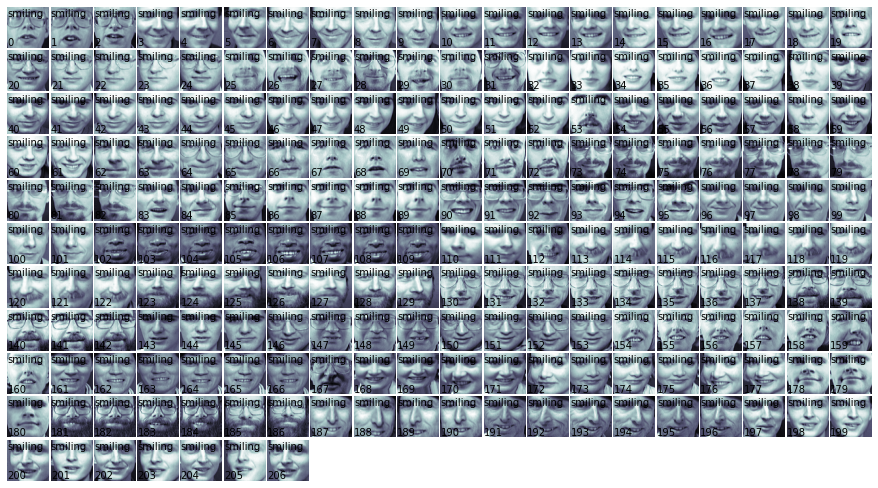

In [102]:
fig = plt.figure(figsize=(12, 12))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
for i in range(len(smiling_indices)):
  # plot images in a 20x20 matrix
  p = fig.add_subplot(20, 20, i + 1)
  p.imshow(faces.images[smiling_indices[i]], cmap=plt.cm.bone)

  # label the image with the target value
  p.text(0, 14, 'smiling')
  p.text(0, 60, str(i))
  p.axis('off')

In [103]:
not_smiling_indices = [int(i) for i in results if results[i] == False]

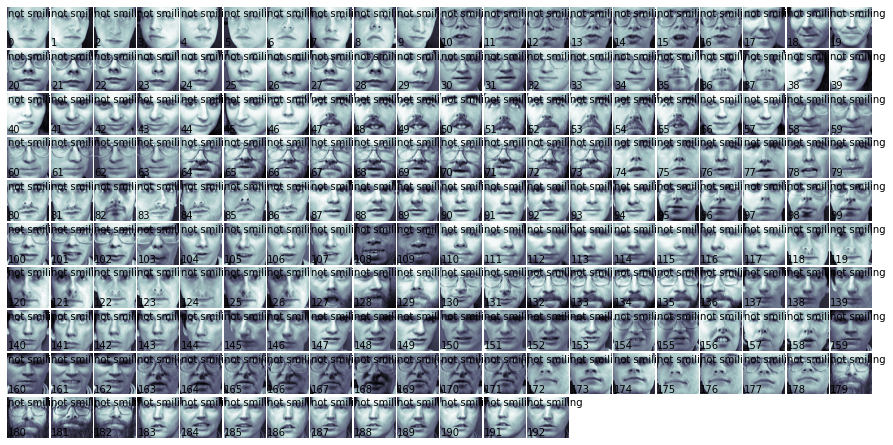

In [105]:
fig = plt.figure(figsize=(12, 12))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
for i in range(len(not_smiling_indices)):
  # plot images in a 20x20 matrix
  p = fig.add_subplot(20, 20, i + 1)
  p.imshow(faces.images[not_smiling_indices[i]], cmap=plt.cm.bone)

  # label the image with the target value
  p.text(0, 14, 'not smiling')
  p.text(0, 60, str(i))
  p.axis('off')

In [106]:
# Training the smile classifer

In [107]:
from sklearn.svm import SVC
svc_1 = SVC(kernel='linear')

In [112]:
# data
indices = [int(i) for i in results]
data = faces.data[indices, :]

In [118]:
# target
target = [results[i] for i in results]
target = array(target).astype(int32)

In [121]:
print('data:', data.shape, data.dtype)
print('target:', target.shape, target.dtype)

data: (400, 4096) float32
target: (400,) int32


In [125]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    data, target, test_size=0.25, random_state=0
)

In [142]:
from sklearn import metrics

def train_and_evaluate(clf, X_train, X_test, y_train, y_test):

  clf.fit(X_train, y_train)

  print ("Accuracy on training set:")
  print (clf.score(X_train, y_train))
  print ("Accuracy on testing set:")
  print (clf.score(X_test, y_test))

  y_pred = clf.predict(X_test)

  print ("Classification Report:")
  print (metrics.classification_report(y_test, y_pred))
  print ("Confusion Matrix:")
  print (metrics.confusion_matrix(y_test, y_pred))

In [143]:
train_and_evaluate(svc_1, X_train, X_test, y_train, y_test)

Accuracy on training set:
1.0
Accuracy on testing set:
0.76
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.72      0.76        53
           1       0.72      0.81      0.76        47

    accuracy                           0.76       100
   macro avg       0.76      0.76      0.76       100
weighted avg       0.77      0.76      0.76       100

Confusion Matrix:
[[38 15]
 [ 9 38]]


In [ ]:
# testing the classifier

Button(description='New image!', style=ButtonStyle())

this person is smiling: [ True]


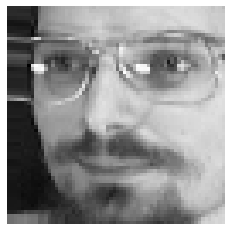

In [162]:
random_image_button = Button(description="New image!")

def display_face_and_prediction(b):
    index = randint(0, 400)
    face = faces.images[index]
    display_face(face)
    display(random_image_button)
    print("this person is smiling: {0}".format(svc_1.predict(faces.data[index, :].reshape(1, -1))==1))

random_image_button.on_click(display_face_and_prediction)
display_face_and_prediction(0)